# 使用 OpenCV 做人臉偵測

In [ ]:
import cv2

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
import requests
from io import BytesIO

In [ ]:
import numpy as np

In [ ]:
# 從網路上讀取圖片，放到 PIL Image 裡面去
url = "https://i.epochtimes.com/assets/uploads/2018/08/PO_X95711-600x400.jpg"
r = requests.get(url)
pilimage = Image.open(BytesIO(r.content))
pilimage

In [12]:
# PIL Image ==> OpenCV Image
opencvImage = cv2.cvtColor(np.array(pilimage), cv2.COLOR_RGB2BGR)

# 取得 face detector
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Detect faces in the image
gray = cv2.cvtColor(opencvImage, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

print("Found {0} faces!".format(len(faces)))

Found 1 faces!


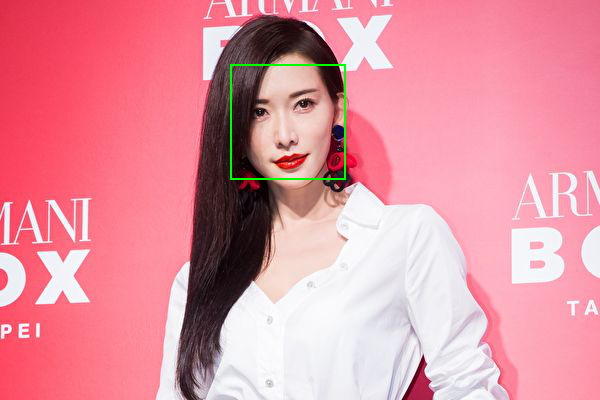

In [17]:
# 將人臉位置用 rectangle 標示出來 (作法一)
draw = ImageDraw.Draw(pilimage)
for (x, y, w, h) in faces:
    draw.rectangle([(x, y), (x+w, y+h)], outline="#00FF00", width=2)
pilimage

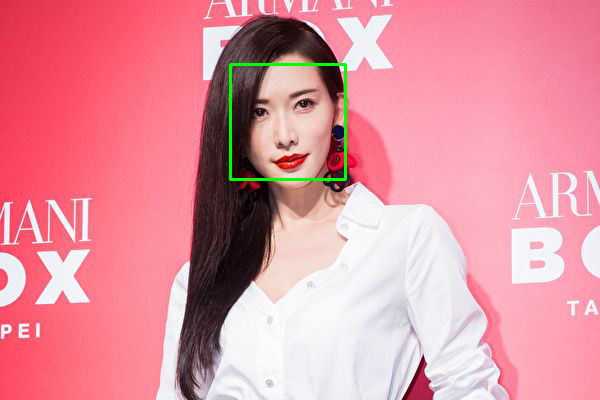

In [18]:
# 將人臉位置用 rectangle 標示出來 (作法二)
for (x, y, w, h) in faces:
    cv2.rectangle(opencvImage, (x, y), (x+w, y+h), (0, 255, 0), 2)

# OpenCV Image ==> PIL Image
faceImage = cv2.cvtColor(opencvImage, cv2.COLOR_BGR2RGB)
res = Image.fromarray(faceImage)
res